# Notebook (Pytorch)
 Martín Hernández
 FAU

## Contents

1. Theoretical Framework

  1.1. Optimization Problem

  1.2. Classical Models

  1.3. Optimization Algorithms in Deep Learning

2. Programming

  2.1. Basic Operations in PyTorch

  2.2. Linear Regression

  2.3. One-Layer Neural Network for Classification (Exercise)

  2.4. Three-Layer Neural Network (MNIST)

  2.5. ResNet for Classification


# 1. Theoretical Framework

## 1.1 Optimization Problem

For a given dataset $\{x_i,y_i\}_{i=1}^{N}$, we aim to solve the minimization problem

$$\min_{\theta \in \Theta} \left\{ Loss(\theta) = \frac{1}{N} \sum_{i=1}^{N} l(y_i, \hat{y}_i(\theta)) \right\},$$

where $\hat{y}_i(\theta)$ is the output of $\hat{y}_i(\theta) = model(x_i, \theta)$.


 **How can we implement numerically this when "model" is a neural network\?**

## 1.2 Deep Learning Models

### Activation functions:

<img src="images\activation_1.png" alt="drawing" width="2000"/>


### Classical models:
1. **Multilayer Perceptron**: Let $L \geq 0$ be the depth, the integers $d_0, \dots, d_L$, and $x^0 \in \mathbb{R}^{d_0}$.

    $$ x^{k+1} = \sigma(W^k x^{k} + b^k), \quad k \in \{0, \dots, L-1\},$$
    
    where $W^k \in \mathbb{R}^{d_{k+1} \times d_{k}}$ and $b^k \in \mathbb{R}^{d_{k+1}}$.
    
<img src="images\mlp.png" alt="drawing" width="800"/>

2. **Residual Neural Networks (ResNets)**: A residual term is added. Let the integers $p_0, \dots, p_L$ and $x^0 \in \mathbb{R}^{d}$. The ResNet is given by

    $$ x^{k+1} = x^{k} + A^k \sigma(W^k x^{k} + b^k), \quad k \in \{0, \dots, L\},$$
    
    where $A^k \in \mathbb{R}^{d \times p_k}$, $W^k \in \mathbb{R}^{p_k \times d}$, and $b^k \in \mathbb{R}^{p_k}$.

<img src="images\resnet.png" alt="drawing" width="800"/>


## 1.3 Optimization in Deep Learning

### Classical Loss Functions

1. **Mean Square Error (MSE)**: Used for regression tasks. It is given by
   $$Loss(\theta) = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i(\theta)|^2$$
   (using the $l^1$-norm, this norm is called Mean Absolute Error (MAE)).


2. **Cross-Entropy Loss**: Used for binary classification ($\{a_1, a_2\}$) and multi-classification ($\{a_1, \dots, a_M\}$).

    2.1. For binary classification: We associate the class $a_1$ with 0 and $a_2$ with 1. Then, the loss function is given by
    
     $$Loss(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i(\theta)) + (1 - y_i) \log(1 - \hat{y}_i(\theta))\right)$$

 2.2. For multi-classification: Here we use One-Hot Encoding.
    
   <img src="images\OHE3.png" alt="drawing" width="2000"/>

   Then the loss function is given by
     $$Loss(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{m=1}^{M} y_i^{(m)} \log\left(\hat{y}_i^{(m)}(\theta)\right)$$






## Optimization Algorithms

The goal is to find the minimum of the problem

$$\min_{\theta \in \Theta} \left\{ Loss(\theta) = \frac{1}{N} \sum_{i=1}^N l(y_i, \hat{y}_i(\theta)) \right\}.$$  


### Gradient Descent Algorithm

**Algorithm**: Update the parameters in the opposite direction of the gradient of the cost function.

$$
\theta_{l+1} = \theta_{l} - \alpha \nabla_{\theta}(Loss(\theta_{l})) = \theta_{l} - \alpha \frac{1}{N} \sum_{i=1}^N \nabla_{\theta}(l(y_i, \hat{y}_i(\theta_l)))
$$

In machine learning, we call $\alpha > 0$ the learning rate.


### Challenges in Optimization

1. **Non-convexity**: Due to the nonlinearity of deep learning models, this defines a non-convex problem, which can have many local minima and saddle points.

2. **Large-scale Data**: This realm involves large datasets.


### Classical Algorithms in Machine Learning

$$Loss(\theta) = \frac{1}{N} \sum_{i=1}^N l(y_i, \hat{y}_i(\theta))$$

1. **SGD (Stochastic Gradient Descent)**: Update the parameters following one randomly chosen gradient. For each $l > 0$, we randomly choose $J \in \{1, \dots, N\}$. Then

$$
\theta_{l+1} = \theta_{l} - \alpha \nabla_{\theta}(l(y_J, \hat{y}_J(\theta)))
$$

2. **Mini-Batch Gradient Descent**: Update the parameters following a randomly chosen batch of gradients. For each $l > 0$, we randomly choose $B \subset \{1, \dots, N\}$. Then

$$
\theta_{l+1} = \theta_{l} - \alpha \frac{1}{|B|} \sum_{i \in B} \nabla_{\theta}(l(y_i, \hat{y}_i(\theta_l)))
$$


## 1.4 How to Implement This

Classical libraries to implement neural network training:

1. Numpy
2. **Pytorch**
3. Tensorflow
4. Scikit-learn


### General structure

<img src="images\gen_struct.png" alt="drawing" width="2000"/>


### Backpropagation + Computation Graph

<img src="images\CompGraph.png" alt="drawing" width="2000"/>


# 2 Let's programming!

We will use **Pytorch**.

PyTorch is an open-source deep learning framework that provides a flexible and efficient platform for building and training neural networks. It is known for its dynamic computation graph, ease of use, and strong support for GPU acceleration.

## 2.1 How works with pytorch

In [ ]:
### Import libraries
import torch

#### Tensor definition

In [ ]:
first_tensor = torch.tensor([1,2,3])
print(first_tensor)

tensor([1, 2, 3])


In [ ]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)


tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


#### Tensor addition

In [ ]:
sum_tensor = torch.add(random,ones)    #This is equivalent to
print(sum_tensor)

sum_tensor_2 = random + ones           #this
print(sum_tensor_2)


tensor([[1.3126, 1.3791, 1.3087],
        [1.0736, 1.4216, 1.0691]])
tensor([[1.3126, 1.3791, 1.3087],
        [1.0736, 1.4216, 1.0691]])


#### Tensor multiplication

In [ ]:
x = torch.ones(2, 2) + 1
y = torch.ones(2, 2)

print(x)
print(y)

tensor([[2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
print(torch.mul(x,y))        # Component multiplication
print(torch.matmul(x, y))    # Classic matrix multilplication

tensor([[2., 2.],
        [2., 2.]])
tensor([[4., 4.],
        [4., 4.]])


#### Special operations

In [ ]:
x =  torch.rand(2,3)
print(x)

tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


In [ ]:
print(torch.sum(x))     # sum of all entries
print(torch.mean(x))    # average of all entries
print(torch.std(x))     # standard deviation of all entries
print(torch.prod(x))    # product of all entries

tensor(2.8534)
tensor(0.4756)
tensor(0.2886)
tensor(0.0050)


In [ ]:
print(torch.sum( x , axis=0))    # Product only with respect the colums
print(torch.prod( x , axis=1))    # Product only with respect the rows

tensor([1.2259, 0.8174, 0.8101])
tensor([0.0204, 0.2433])


#### Tensor Shape

In [ ]:
x = torch.ones(2, 8)
print(x.shape)

torch.Size([2, 8])


#### Tensor re-shape

In [ ]:
#### Flat a tensor
x = torch.ones(4,4)
print(x.view(2,8))

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


In [ ]:
# Automatical flat
print(x.view(-1,8))  # With the -1 pytorch automaticaly compute which size should be there.

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


#### Tranform from Numpy to Pytorch

In [ ]:
import numpy as np

In [ ]:
x = np.ones(5)
print(type(x))

x = torch.from_numpy(x)
print(type(x))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


#### Add to the computational graph

**Example 0:** In this example we will compute the derivate of the function $z:\mathbb{R}^4\to\mathbb{R}$ given by

$$ z(x)=\sum_{i=1}^4|x_i+2|^2,$$

at the point $x = (1,1,1,1)$, where $x_i$ denote the i-th component of $x$. To make simpler we decompose the function in the following way

0) We need to define x = torch.ones(4, <span style="color:red" > requires_grad=True</span> ). This last command tells torch that from these variables we are going to build the computational graph.

1) y =  x + 1

2) w = y*y

3) z = w.mean()

4) We compute the 'backpropagation' with the command **z.backward()**. To access to $dz/dx$ evaluated in (1,1,1,1), we use **x.grad()**.

In [ ]:
# Step 0: Add to the computational graph
x = torch.ones(4, requires_grad=True )
print(f'values of x: {x}')

# Step 1:
y = x + 2
print(f'values of y: {y}')

# Step 2:
w = y*y
print(f'values of w: {w}')

# Step 3:
z = w.mean()  # z: x \in \R^4 ---> \R
print(f'values of z: {z}')

# Step 4: Compute dz/dx
z.backward()

print(f'values of dz/dx at (1,1,1,1): {x.grad}')



values of x: tensor([1., 1., 1., 1.], requires_grad=True)
values of y: tensor([3., 3., 3., 3.], grad_fn=<AddBackward0>)
values of w: tensor([9., 9., 9., 9.], grad_fn=<MulBackward0>)
values of z: 9.0
values of dz/dx at (1,1,1,1): tensor([1.5000, 1.5000, 1.5000, 1.5000])


**Note**: Observe that when "requires_grad=True" is activated, every variable defined from $x$ has the property *grad_fn* which save how is acting (multiplying of summing).

We can deactivate the tracking in the computational graph with the comand **.detach()**.

In [ ]:
x = torch.ones(4, requires_grad=True )
y = x.detach()

print(x)
print(y)

tensor([1., 1., 1., 1.], requires_grad=True)
tensor([1., 1., 1., 1.])


In [ ]:
w = y*y
print(w)

tensor([1., 1., 1., 1.])


**Important note:** Every time that we compute the gradient it is neccesary **Clean** the gradient or we will have wrong results.

As we saw in the previous example $dz/dx$ at (1,1,1,1) was (1.5, 1.5, 1.5, 1.5). However, if we compute this gradient many time with out clean the variable **x.grad** we have some errors.

In [ ]:
x = torch.ones(4, requires_grad=True )

In [ ]:
for _ in range(4):
    y = x + 2
    w = y*y
    z = w.mean()  # z: x \in \R^4 ---> \R

    z.backward()

    print(x.grad)
    #x.grad.zero_()      ###<-------- Uncomment this to clean the x.grad()

tensor([1.5000, 1.5000, 1.5000, 1.5000])
tensor([3., 3., 3., 3.])
tensor([4.5000, 4.5000, 4.5000, 4.5000])
tensor([6., 6., 6., 6.])


**Exercise 0 (optional)**: Compute the gradient at $x = \overrightarrow{0}$ of the function $f: \mathbb{R}^5 \to \mathbb{R}$ defined by

$$f(x) = \prod_{i=1}^5 |x_i - 1|^4.$$


In [ ]:
# Step 0: Add to the computational graph

x = torch.zeros(5, requires_grad=True)

# Compute the steps
y = x - 1

w = y**4

z = w.prod()

# Step n: Compute df/dx

z.backward()

gradient_value = x.grad

# Print the result
print(gradient_value)

# Clean the gradients
x.grad.zero_()

In [ ]:
# Step 0: Add to the computational graph

x = torch.zeros(5, requires_grad=True)

# Compute the steps
y = x - 1

w = y**4

z = w.prod()

# Step n: Compute df/dx

z.backward()

gradient_value = x.grad

# Print the result
print(gradient_value)

# Clean the gradients
x.grad.zero_()

tensor([-4., -4., -4., -4., -4.])


tensor([0., 0., 0., 0., 0.])

#### Activation functions

In [ ]:
x = torch.rand(5) - 0.5
print(f'value of x: {x}')

value_sigmoid = torch.sigmoid(x)
print(f'value of sigmoid(x): {value_sigmoid}')

value_tanh = torch.sigmoid(x)
print(f'value of tanh(x): {value_tanh}')

value of x: tensor([ 0.1128, -0.3481, -0.4547,  0.0035,  0.4978])
value of sigmoid(x): tensor([0.5282, 0.4139, 0.3883, 0.5009, 0.6219])
value of tanh(x): tensor([0.5282, 0.4139, 0.3883, 0.5009, 0.6219])


**Not all activation functions are in torch**

In [ ]:
import torch.nn as nn  #Library for models

In [ ]:
relu = nn.ReLU()
value = relu(x)
print(f'value of ReLU(x): {value}')

value of ReLU(x): tensor([0.1128, 0.0000, 0.0000, 0.0035, 0.4978])


## 2.2 Example 1 (Linear regresion)

In [ ]:
# import libraries
import torch
import torch.nn as nn          #Library for models
import numpy as np
from sklearn import datasets    #Library for the dataset
import matplotlib.pyplot as plt #Plot the results

We aim to find a linear function $\phi:\mathbb{R}\to\mathbb{R}$ such that minimize the MSE of the data.

## Model definition

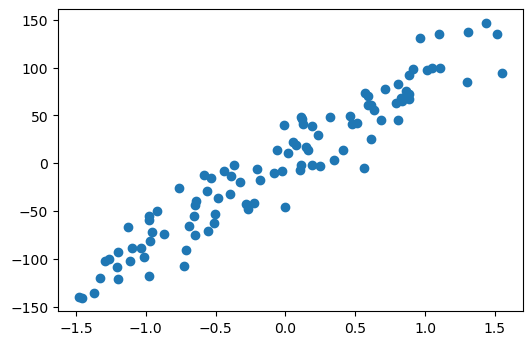

In [ ]:
# DATA DEFINITION

n_features = 1              # Dimension of the labels
n_samples = 100             # Number of data points

X_num, y_num = datasets.make_regression(n_samples = n_samples, n_features = n_features, noise = 20)


### PLOT THE DATA SET

plt.figure(0,dpi=100)
plt.scatter(X_num,y_num)

In [ ]:
# Tranform the data to torch tensors
X = torch.from_numpy(X_num.astype(np.float32))
y = torch.from_numpy(y_num.astype(np.float32))

X.shape , y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [ ]:
y = y.view(y.shape[0],1)
X.shape , y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

### General structure

<img src="images\gen_struct.png" alt="drawing" width="2000"/>


### Model definition


In [ ]:
## MODEL DEFINITION

input_size = 1
output_size = n_features

model =  nn.Linear(input_size,output_size) # model(x) = Wx + b

In [ ]:
### LOSS AND OPTIMIZER DEFINITION

#loss
lr = 0.01
Loss = nn.MSELoss()

#optimizer
parameters = model.parameters()
optimizer = torch.optim.SGD(parameters, lr = lr)   #This is GD since we have not specify the size of the data batch

## Trainning

In [ ]:
num_epoch = 300  #gradient descence steps in the full data
for i in range(num_epoch):

    #COMPUTE PREDICTION
    y_pred = model(X)
    loss_pred = Loss(y_pred,y)

    #GRADIENTS COMPUTATION
    loss_pred.backward()

    #PARAMETERS UPDATE
    optimizer.step()
    optimizer.zero_grad()

    #print epochs

    if i%50 == 0:
        print(f'Epoch: {i}, Loss: {loss_pred.item():.4f} ')

Epoch: 0, Loss: 5164.9561 
Epoch: 50, Loss: 1797.4398 
Epoch: 100, Loss: 834.9841 
Epoch: 150, Loss: 557.7302 
Epoch: 200, Loss: 477.5735 
Epoch: 250, Loss: 454.3613 


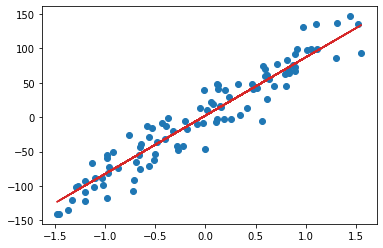

In [ ]:
prediction = model(X).detach().numpy()
plt.scatter(X,y)
plt.plot(X, prediction, c='tab:red')

**Note:** We have considered the model = nn.Linear(input, output). However, in general, we use classes to define the model.

### Basic about Classes

*Almost everything in Python is an object, with its properties and methods*

A Class is like an object constructor

In [ ]:
class MyClass:
    def __init__(self, name, age): # The properties of the class are "name" and "age"
        self.name = name
        self.age = age

person_1 = MyClass('John', 27)  # person_1 is a particular instance of the class "MyClass" because it has particular properties

print(f'Name: {person_1.name}')
print(f'Age: {person_1.age}')

Name: John
Age: 27


In [ ]:
person_2 = myclass('Felix', 30)
print(f'Name: {person_2.name}')
print(f'Age: {person_2.age}')

Name: Felix
Age: 30


In [ ]:
class myclass:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say_hi(self):         ## We can add some "methods" to the class
        print(f'Hi, my name is {self.name}.')

    def one_year_older(self):
        self.age = self.age + 1

person = myclass('John', 27)

print(f'Name : {person.name}')
print(f'Age: {person.age}')

person.say_hi()

Name : John
Age: 27
Hi, my name is John.


In [ ]:
person.one_year_older()
print(f'Age: {person.age}')


Age: 28


#### Equivalent way to define the linear model

In [ ]:
### EQUIVALENT WAY

class ModelLin(nn.Module): # The (nn.Module) allows access to nn.Module methods and properties

    def __init__(self, input_size, output_size):
        super(ModelLin, self).__init__() # Super allows us to use the methods/functions in nn.Module
        self.linear_layer = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear_layer(x)
        return out


model = ModelLin(input_size, output_size) # y = Wx + b


In [ ]:
# Check the model
model

model_lin(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### Exercise 1:

Let us consider the following dataset

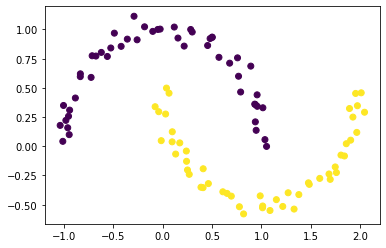

In [ ]:
# DATA DEFINITION

n_features = 1              # Dimension of the labels
n_samples = 100             # Number of data points

X_num, y_num = datasets.make_moons(n_samples = n_samples, noise = 0.05)


### PLOT THE DATA SET

plt.scatter(X_num[:, 0], X_num[:, 1], c=y_num)


**Train a one-layer neural network using the sigmoid function** to classify the dataset.


In [ ]:
#### 1) Transform the dataset to torch elements

X = torch.Tensor(X_num)
y = torch.Tensor(y_num)
y = y.view(-1, 1)

#### 2) Define the model using classes

# Hint: Use "out = torch.sigmoid(out)" in the forward process*

class my_model(nn.Module):
    def __init__(self, input_size, output_size):
        super(my_model, self).__init__()                       #Super allows us to use the methods/functions in nn.module
        self.linear_layer = nn.Linear(input_size,output_size)

    def forward(self,x):
        out = self.linear_layer(x)
        out = torch.sigmoid(out)
        return out

input_dim = 2  # Observe that the dataset consists of points in \(\mathbb{R}^2\)
output_dim = 1 # Each point is associated with one color (real number).

model = my_model(input_dim, output_dim)

### 3) LOSS AND OPTIMIZER DEFINITION

lr = 0.01
Loss = nn.BCELoss()   # Here use binary cross entropy "nn.BCELoss()"

# Optimizer
parameters = my_model.parameters()
optimizer =  torch.optim.SGD(parameters, lr = lr)  # Use GD

#### 4) TRAINING PROCESS

num_epoch = 300 # Gradient descent steps on the full data
for i in range(num_epoch):

    # COMPUTE PREDICTION
    y_pred = my_model(X)
    loss_pred = Loss(y,y_pred)

    # GRADIENTS COMPUTATION
    loss_pred.backward()
    # PARAMETERS UPDATE
    optimizer.step()
    optimizer.zero_grad()

    # Print epochs
    if i % 30 == 0:
        print(f'Epoch: {i}, Loss: {loss_pred.item():.4f}')


In [ ]:
#### 1) Transform the dataset to torch elements

X = torch.Tensor(X_num)
y = torch.Tensor(y_num)
y = y.view(-1, 1)

#### 2) Define the model using classes

# Hint: Use " out = torch.sigmoid(out) " in the forward.

class my_model(nn.Module):
    def __init__(self, input_size, output_size):
        super(my_model, self).__init__()                       #Super allows us to use the methods/functions in nn.module
        self.linear_layer = nn.Linear(input_size,output_size)

    def forward(self,x):
        out = self.linear_layer(x)
        out = torch.sigmoid(out)
        return out

input_dim = 2
output_dim = 1

model = my_model(input_dim, output_dim)

### 3) LOSS AND OPTIMIZER DEFINITION
#loss
lr = 0.09
Loss = nn.BCELoss()    # Here we use binary cross entropy

#optimizer
parameters = model.parameters()
optimizer = torch.optim.SGD(parameters, lr = lr)    # Use GD


# 4) TRAINING PROCESS

num_epoch = 2000         #gradient descence steps in the full data
for i in range(num_epoch):

    #COMPUTE PREDICTION
    y_pred = model(X)
    loss_pred = Loss(y_pred, y)

    #GRADIENTS COMPUTATION
    loss_pred.backward()

    #PARAMETERS UPDATE
    optimizer.step()
    optimizer.zero_grad()     #CLEAN GRADIENTS

    #print epochs
    if i%500 == 0:
        print(f'Epoch: {i}, Loss: {loss_pred.item():.4f} ')

Epoch: 0, Loss: 0.8134 
Epoch: 500, Loss: 0.3045 
Epoch: 1000, Loss: 0.2756 
Epoch: 1500, Loss: 0.2661 


For $x\in(0,1)$, the function **torch.round(x)** maps the values of $x$ to 0 if $x\leq 0.49$, in other case $x$ is map to $1$.

In [ ]:
y_predicted = torch.round(model(X))       #Compute the predict and apply round function
y_pred = y_predicted.detach().numpy()

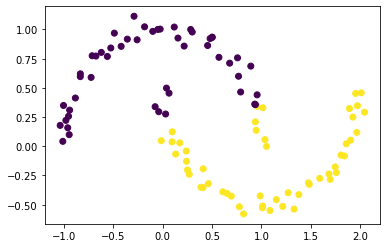

In [ ]:
plt.scatter(X_num[:,0], X_num[:,1], c=y_pred,  alpha=1)

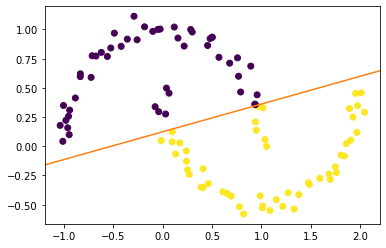

In [ ]:
# We obtain the parameter of the NN

dic={}
for i, param in enumerate(model.parameters()):
    dic['P'+str(i)] = param[0].detach().numpy()

# dic[P0] : is the W = [w_1, w_2]
# dic[P1] : is the b\in \R

# The equation "0 = W x + b"  define a line with slop -w_1/w_2 and passing through the point (0, -b/w_2).

fig, ax = plt.subplots()
ax.axline((0, (-dic['P1'])/dic['P0'][1]), slope=-dic['P0'][0]/dic['P0'][1], color='C1')
ax.scatter(X_num[:,0], X_num[:,1], c=y_pred,  alpha=1)

## 2.3 Example 2 (Neuronal Network for the MNIST dataset)

The MNIST database contains 60,000 training images and 10,000 testing images.


1. Each image of size: $28\times 28$.
2. We have $10$ classes.

In [ ]:
# Import the libraries
import torch
import torch.nn as nn  #To define the model
import torchvision     #To define the data set
import torchvision.transforms as transforms  #To apply tranformations to the data
import matplotlib.pyplot as plt             #To plot the results

## Model definition

<img src="images\training_data.png" alt="drawing" width="800"/>

In [ ]:
#Training
train_data =  torchvision.datasets.MNIST(root = './MNIST_data', train=True, transform = transforms.ToTensor(), download=True)
#Test
test_data =  torchvision.datasets.MNIST(root = './MNIST_data', train=False, transform = transforms.ToTensor())

To apply Mini-batch gradient descent we divide the data

<img src="images\batch_size.png" alt="drawing" width="800"/>

In [ ]:
batch_size = 100 #we define a batch_size

# The following functions allow us to define torch elements (train and test datas) that contain the batches of the data

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle =True)

test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle =False)

torch.Size([100, 1, 28, 28]) torch.Size([100])


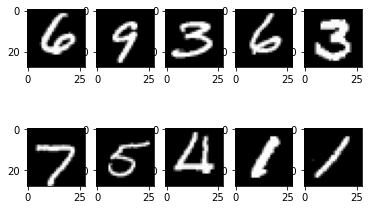

In [ ]:
batches = iter(train_loader) # Define an element that we can iterate with .next()
#let see how looks a batch
samples, labels = batches.next()   # IF YOU HAVE AN ERROR BECAUSE THE ".next()" USE "next(batches)"
print(samples.shape, labels.shape)

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(samples[i][0], cmap="gray")

In [ ]:
## MODEL DEFINITION

input_size = 28*28 # 28x28 pixels on each image
output_size = 10 # 10 classes

We consider a 3 layer multilayer perceptron.

<img src="3layer_mlp.png" alt="drawing" width="1300"/>

In [ ]:
# MODEL DEFINITION
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self,x):
        out_0 = self.l1(x)
        out_1 = self.relu(out_0)
        out_2 = self.l2(out_1)
        return out_2

hidden_size = 100

model = NN(input_size, hidden_size, output_size)

In [ ]:
# Check the model
model

NN(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
### LOSS AND OPTIMIZER DEFINITION

#loss
lr = 0.001
Loss = nn.CrossEntropyLoss()

#optimizer
parameters = model.parameters()
optimizer = torch.optim.SGD(parameters, lr = lr)   #This is GD since we have not specify the size of the data batch

### Training

In [ ]:
n_epoch= 10
for epoch in range(n_epoch):
    for i, (images, labels) in enumerate(train_loader): # for a batch size = 100, we iterate 600 times (600*100=60000 )

        X = images.view(-1, 28*28)

        #FORWARD PASS
        y_pred =  model(X)
        loss_pred = Loss(y_pred, labels)

        #BACKWARD PASS
        loss_pred.backward()

        #PARAMETERS UPDATE
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%300 == 0 and (epoch+1)%2==0:
            print(f'epoch: {epoch+1}/ {n_epoch}, step: {i+1}/{600}, loss: {loss_pred:.4f}')

epoch: 2/ 10, step: 250/600, loss: 2.1605
epoch: 2/ 10, step: 500/600, loss: 2.1388
epoch: 4/ 10, step: 250/600, loss: 1.8830
epoch: 4/ 10, step: 500/600, loss: 1.7222
epoch: 6/ 10, step: 250/600, loss: 1.5074
epoch: 6/ 10, step: 500/600, loss: 1.3930
epoch: 8/ 10, step: 250/600, loss: 1.1730
epoch: 8/ 10, step: 500/600, loss: 1.0312
epoch: 10/ 10, step: 250/600, loss: 0.9030
epoch: 10/ 10, step: 500/600, loss: 0.9001


### Data test

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        X_test = images.view(-1,28*28)
        y_pred_test = model(X_test)

        _, predicted_value = torch.max(y_pred_test, 1)
        n_samples += labels.shape[0]
        n_correct += (labels == predicted_value).sum().item()

acc = 100*n_correct/n_samples
print(f'accuracy %: {acc}')

accuracy %: 82.69


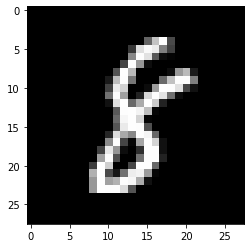

In [ ]:
plt.imshow(images[0][0], cmap="gray")

In [ ]:
_ , pred = torch.max(model(X_test),1)
pred[0]

tensor(8)

## 2.4 Using a deep neural network

Now we going to define a deep neural network (MLP) from a vector that contains the dimension of each layer.

In [ ]:
class deep_NN(nn.Module):
    def __init__(self,  vect_lay): # dim_v=[ input_dim, hidden_dim_1, ..., hidden_dim_n, output_dim]
        super(deep_NN,self).__init__()

        layers = []                       # Define a vector to save each the functions on each layer
        for i in range(len(vect_lay) - 2):
            layers.append(nn.Linear(vect_lay[i], vect_lay[i + 1]))      #Linear layer
            layers.append(nn.ReLU())                                #ReLU function

        layers.append(nn.Linear(vect_lay[-2], vect_lay[-1]))            #we apply the last linear layer
        self.deep_net = nn.Sequential(*layers)                #This function concatenate all out layer

    def forward(self,x):
        out = self.deep_net(x)
        return out

In [ ]:
vect_lay = [28*28,100,55,10]
model = deep_NN(vect_lay)

model

deep_NN(
  (deep_net): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=55, bias=True)
    (3): ReLU()
    (4): Linear(in_features=55, out_features=10, bias=True)
  )
)

In [ ]:
### LOSS AND OPTIMIZER DEFINITION
#loss
lr = 0.001
Loss = nn.CrossEntropyLoss()

#optimizer
parameters = model.parameters()
optimizer = torch.optim.SGD(parameters, lr = lr)

# Training
n_epoch= 10
for epoch in range(n_epoch):
    for i, (images, labels) in enumerate(train_loader):

        X = images.view(-1, 28*28)

        #FORWARD PASS
        y_pred =  model(X)
        loss_pred = Loss(y_pred, labels)

        #BACKWARD PASS
        loss_pred.backward()

        #PARAMETERS UPDATE
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%300 == 0 and (epoch+1)%2==0:
            print(f'epoch: {epoch+1}/ {n_epoch}, step: {i+1}/{600}, loss: {loss_pred:.4f}')

epoch: 2/ 10, step: 300/500, loss: 2.2598
epoch: 2/ 10, step: 600/500, loss: 2.2527
epoch: 4/ 10, step: 300/500, loss: 2.1861
epoch: 4/ 10, step: 600/500, loss: 2.1735
epoch: 6/ 10, step: 300/500, loss: 2.0751
epoch: 6/ 10, step: 600/500, loss: 2.0436
epoch: 8/ 10, step: 300/500, loss: 1.8372
epoch: 8/ 10, step: 600/500, loss: 1.7467
epoch: 10/ 10, step: 300/500, loss: 1.4672
epoch: 10/ 10, step: 600/500, loss: 1.3229


We compute the accuracy of the model using the test data

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        X_test = images.view(-1,28*28)
        y_pred_test = model(X_test)

        _, predicted_value = torch.max(y_pred_test, 1)
        n_samples += labels.shape[0]
        n_correct += (labels == predicted_value).sum().item()

acc = 100*n_correct/n_samples
print(f'accuracy %: {acc}')

accuracy %: 72.42


## 2.5 ResNet implementation

Recall that the Resnet is given by:

<img src="images\resnet2.png" alt="drawing" width="800"/>


### Model definition


In [ ]:

class ResidualBlock(nn.Module):                      # x + A \sigma( Wx + b)
    def __init__(self, data_dim, hidden_dim):
        super(ResidualBlock, self).__init__()

        self.data_dim = data_dim               #This corresponds to d
        self.hidden_dim = hidden_dim           #this correspods to p_k = p (fixed)

        self.mlp = nn.Sequential(               #concatenate the following 3 functions
            nn.Linear(data_dim, hidden_dim),    # Wx+b
            nn.ReLU(),                          # relu(Wx+b)
            nn.Linear(hidden_dim, data_dim, bias=False))  #A relu(Wx+b)

    def forward(self, x):
        return x + self.mlp(x)   # x + A relu( Wx + b)


class ResNet(nn.Module):
    def __init__(self, data_dim, hidden_dim, num_layers, output_dim=1):
        super(ResNet, self).__init__()
        self.num_layers = num_layers
        self.output_dim = output_dim

        comp_residual_blocks = [ResidualBlock(data_dim, hidden_dim)
                           for _ in range(num_layers)]  #Define a vector with all the
                                                        #residual blocks

        self.com_residual_blocks = nn.Sequential(*comp_residual_blocks)   # We concatenate the vector of residual blocks

        self.linear_layer = nn.Linear(data_dim, output_dim)      # from data_dim to output_dim


    def forward(self, x):

        for block in self.com_residual_blocks: #We apply block by block of our residual_blocks
            x = block(x)

        pred = self.linear_layer(x)
        pred_norm = torch.sigmoid(pred)
        return pred_norm , trajectories

**We will add extra lines in the ResNet class to save the information of each layer.**


In [ ]:
class ResNet(nn.Module):
    def __init__(self, data_dim, hidden_dim, num_layers, output_dim=1):
        super(ResNet, self).__init__()
        self.num_layers = num_layers
        self.output_dim = output_dim

        comp_residual_blocks = [ResidualBlock(data_dim, hidden_dim)
                           for _ in range(num_layers)]  #Define a vector with all the
                                                        #residual blocks

        self.com_residual_blocks = nn.Sequential(*comp_residual_blocks)   # We concatenate the vector of residual blocks

        self.linear_layer = nn.Linear(data_dim, output_dim)      # from data_dim to output_dim


    def forward(self, x):
        trajectories = [x.detach().numpy()] #save the initial value of the trayectory
                                                  #(we use detach to don't disturve in the computational graph)

        for block in self.com_residual_blocks: #We apply block by block of our residual_blocks
            x = block(x)

            trajectories.append(x.detach().numpy())   #We save the trayecty in that specific block

        pred = self.linear_layer(x)
        pred_norm = torch.sigmoid(pred)
        return pred_norm , trajectories

In [ ]:
# Function to plot the trajectories
def plot_trajectories(trajectories,y):
    num_layers = len(trajectories)
    for i, layer_output in enumerate(trajectories):
        plt.figure(figsize=(6, 4),dpi=100)
        plt.scatter(layer_output[:,0],layer_output[:,1],c=y)
        plt.title(f'Layer {i} Output')
        plt.show()


### Exercise 2:

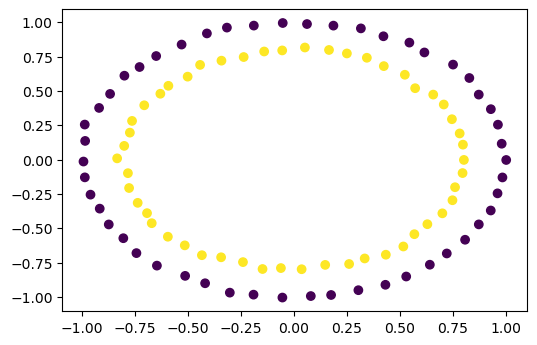

In [ ]:
# DATA DEFINITION
X, y = datasets.make_circles(n_samples=100, noise=0.01)
plt.figure(dpi=100)
plt.scatter(X[:,0], X[:,1],c = y)


In [ ]:
# Convert to PyTorch tensors
X = torch.Tensor(X)
y = torch.Tensor(y)
labels = y.view(-1, 1)

# MODEL DEFINITION
input_dim = 2
hidden_dim = 4
num_layers = 10
output_dim = 1

model = ResNet(input_dim, hidden_dim, num_layers, output_dim)

#Loss function, and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# Training loop
num_epochs = 4000
for epoch in range(num_epochs):

    outputs, _ = model(X)
    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%500==0:
        print(f'epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Plot the evolution of the data

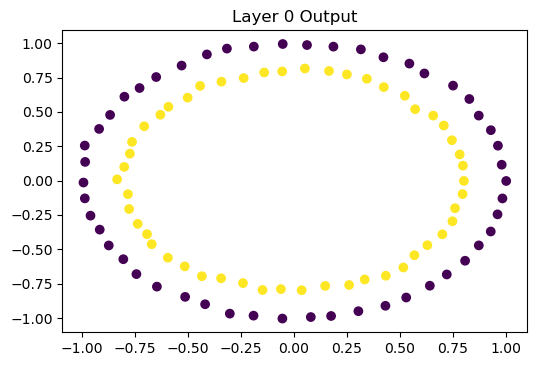

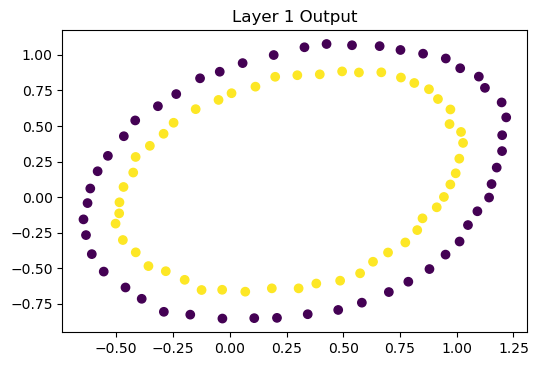

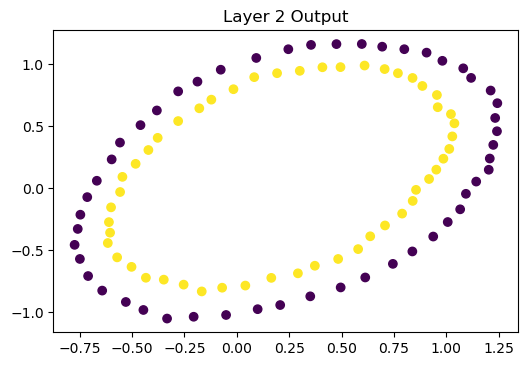

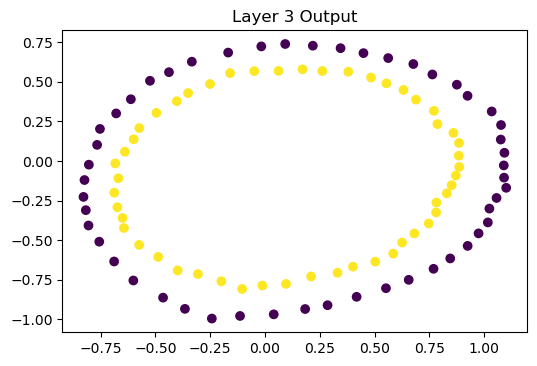

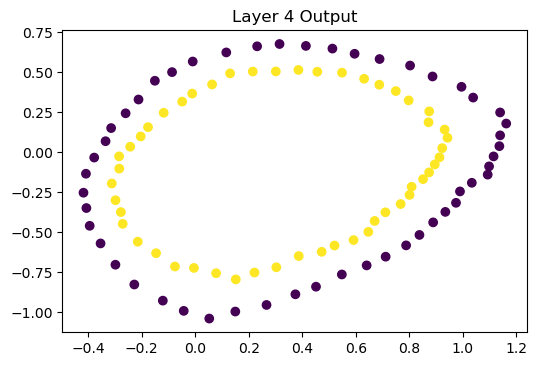

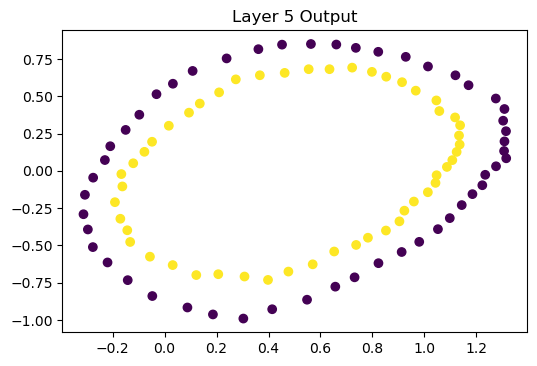

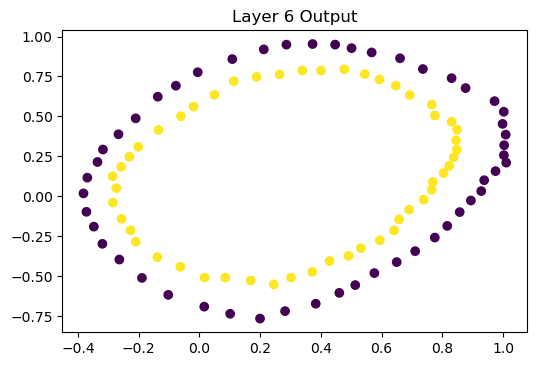

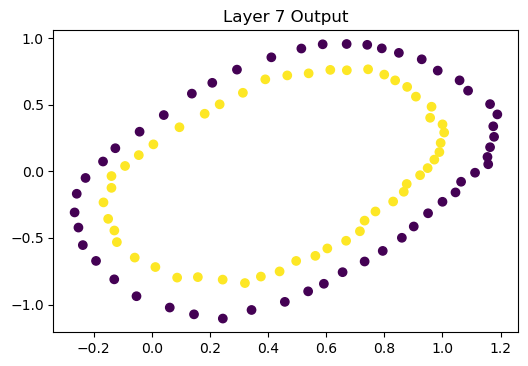

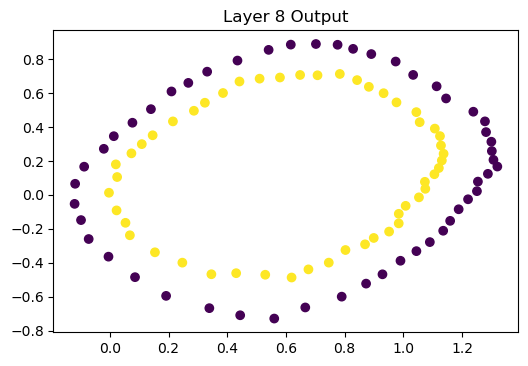

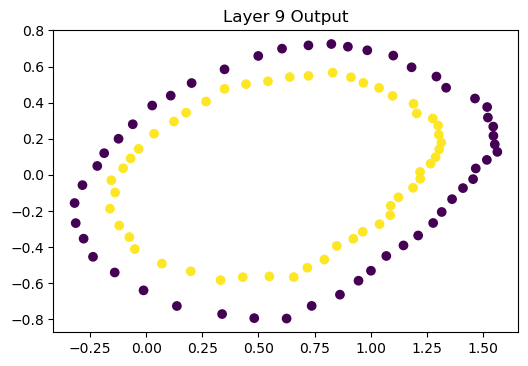

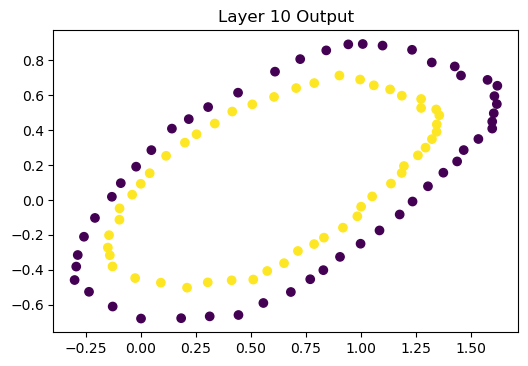

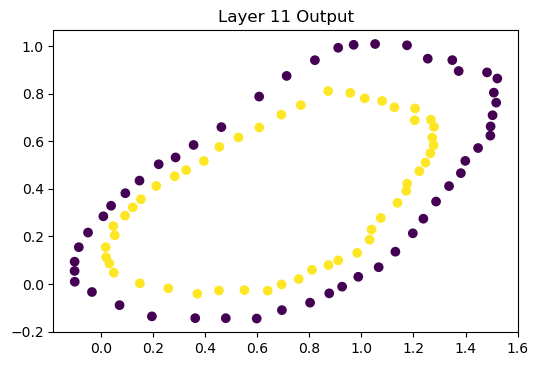

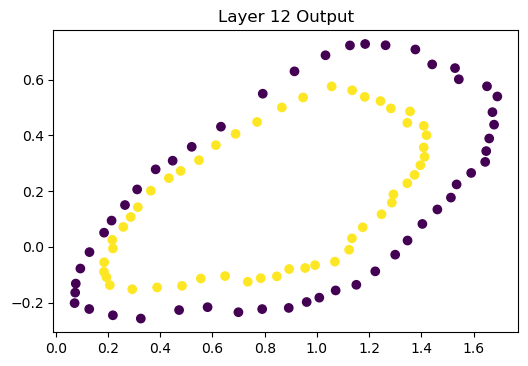

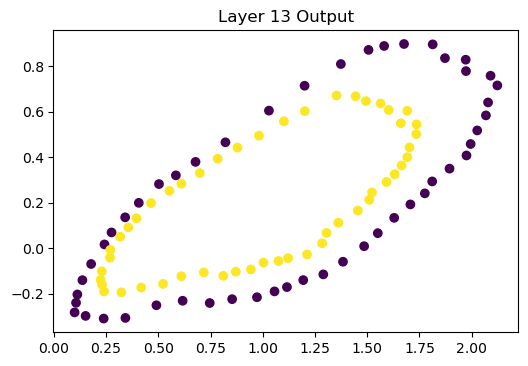

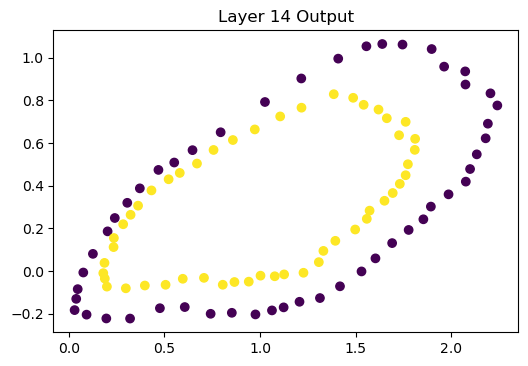

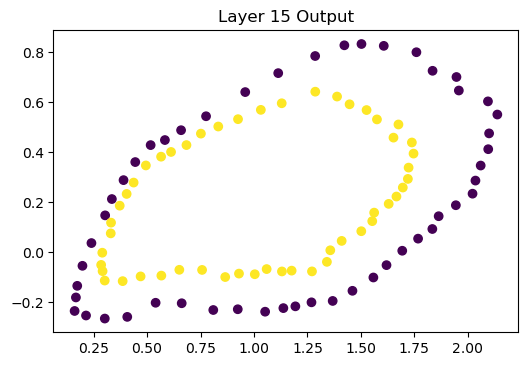

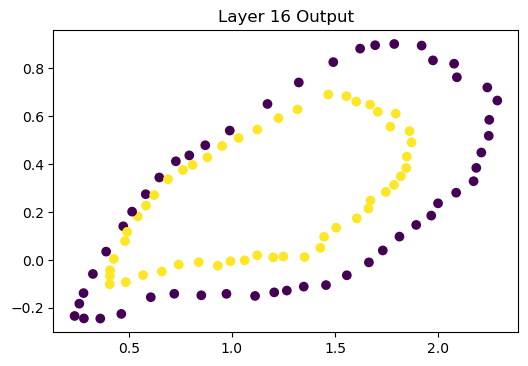

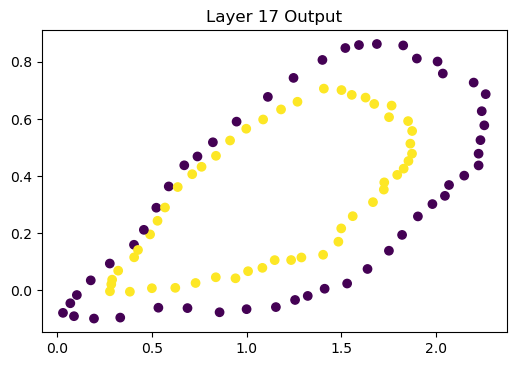

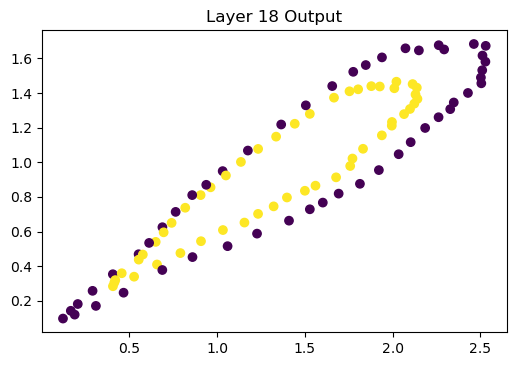

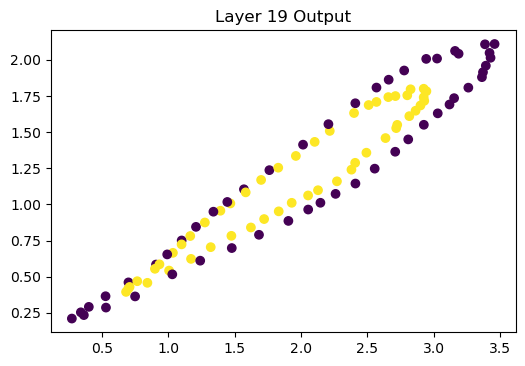

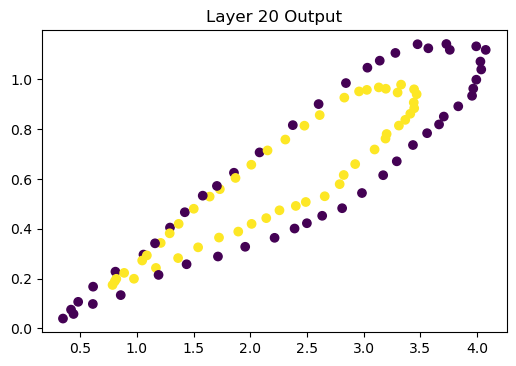

In [ ]:
with torch.no_grad():
    _, trajectories = model(X)
    plot_trajectories(trajectories,y)

### Training with mini-batch gradient descense

In [ ]:
X, y = datasets.make_circles(n_samples=100, noise=0.01)
# Convert to PyTorch tensors
X = torch.Tensor(X)
y = torch.Tensor(y)
labels = y.view(-1, 1)


# Define the batches
dataset =  torch.utils.data.TensorDataset(X,labels)
batch_size = 10
data_batches = torch.utils.data.DataLoader(dataset = dataset, batch_size = batch_size, shuffle =True)

# Model definition

#input_dim = 2
#hidden_dim = 4
#num_layers = 10
#output_dim = 1

model = ResNet(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# Training loop
num_epochs = 4000
for epoch in range(num_epochs):

    for i, (X_batch, Y_batch) in enumerate(data_batches):

        outputs, _ = model(X_batch)
        loss = criterion(outputs, Y_batch)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if (epoch+1)%500==0 and (i+1)%5==0:
                print(f'epoch: {epoch+1}/{num_epochs}, batch: {i+1}/{len(data_batches)}, Loss: {loss.item():.4f}')

epoch: 500/4000, batch: 5/10, Loss: 0.6719
epoch: 500/4000, batch: 10/10, Loss: 0.6942
epoch: 1000/4000, batch: 5/10, Loss: 0.7023
epoch: 1000/4000, batch: 10/10, Loss: 0.6953
epoch: 1500/4000, batch: 5/10, Loss: 0.6907
epoch: 1500/4000, batch: 10/10, Loss: 0.6921
epoch: 2000/4000, batch: 5/10, Loss: 0.7112
epoch: 2000/4000, batch: 10/10, Loss: 0.6703
epoch: 2500/4000, batch: 5/10, Loss: 0.6637
epoch: 2500/4000, batch: 10/10, Loss: 0.7399
epoch: 3000/4000, batch: 5/10, Loss: 0.6568
epoch: 3000/4000, batch: 10/10, Loss: 0.7006
epoch: 3500/4000, batch: 5/10, Loss: 0.6441
epoch: 3500/4000, batch: 10/10, Loss: 0.5976
epoch: 4000/4000, batch: 5/10, Loss: 0.3753
epoch: 4000/4000, batch: 10/10, Loss: 0.4135


### Plot the evolution of the data


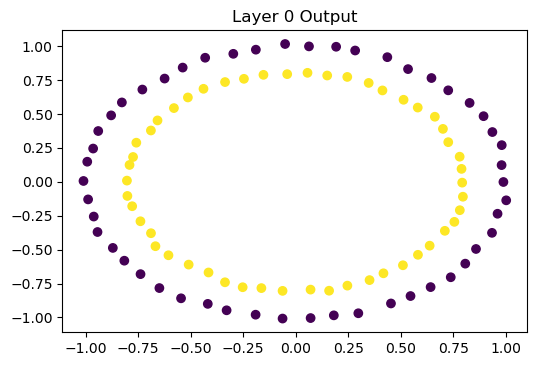

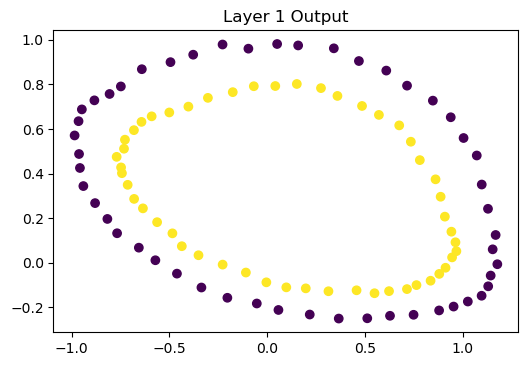

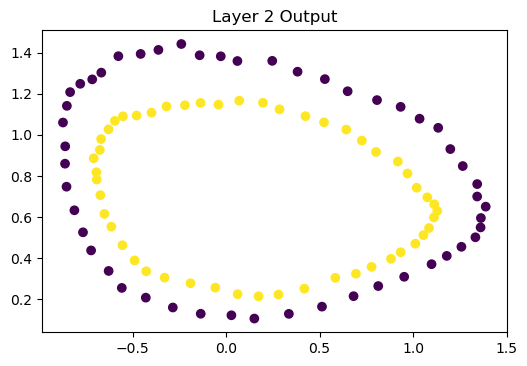

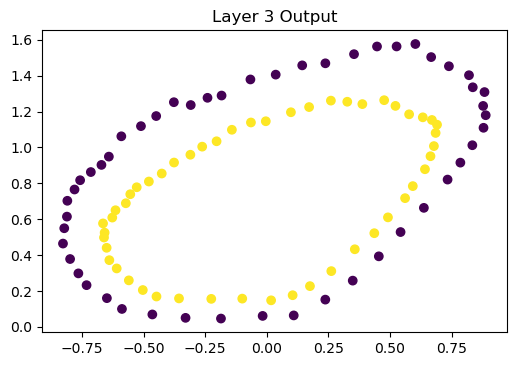

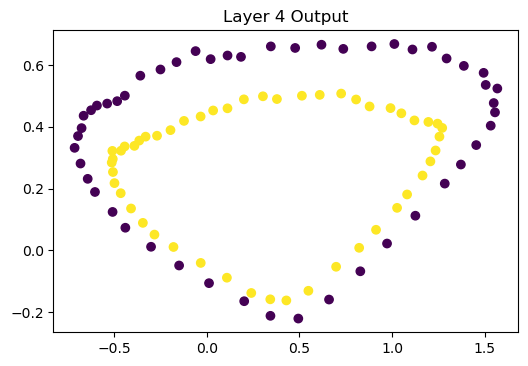

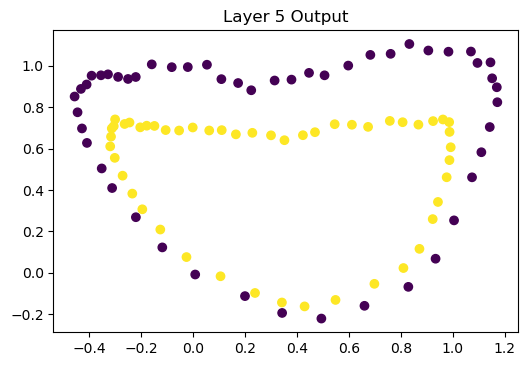

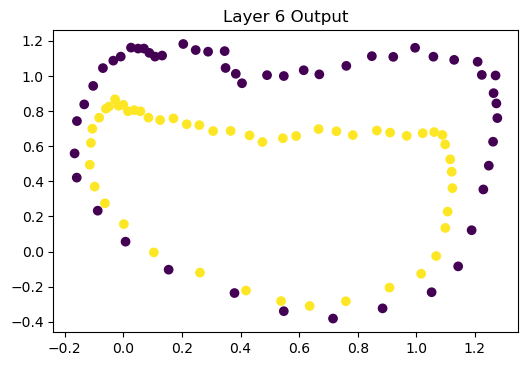

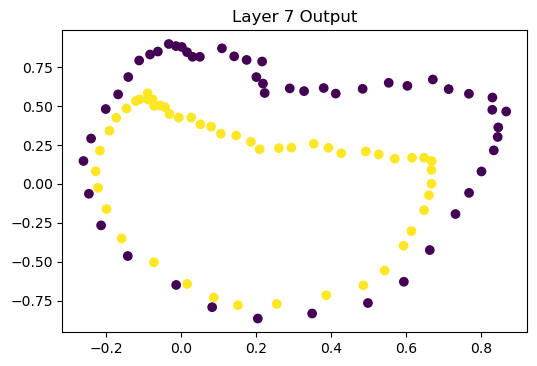

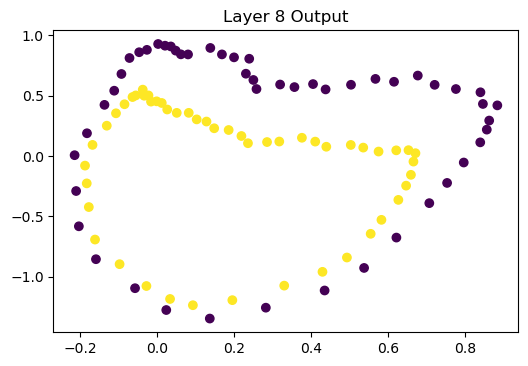

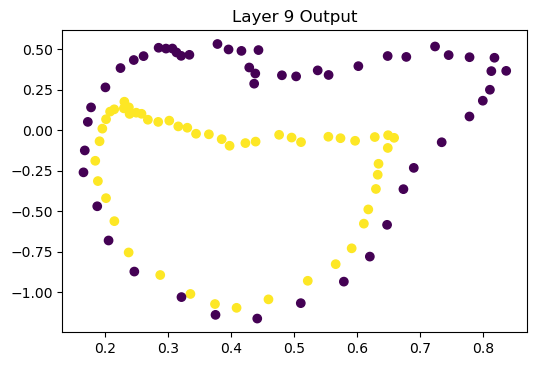

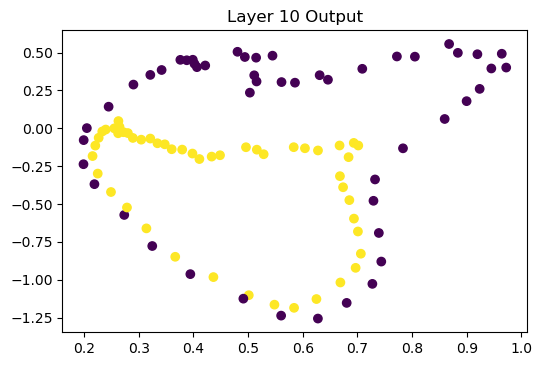

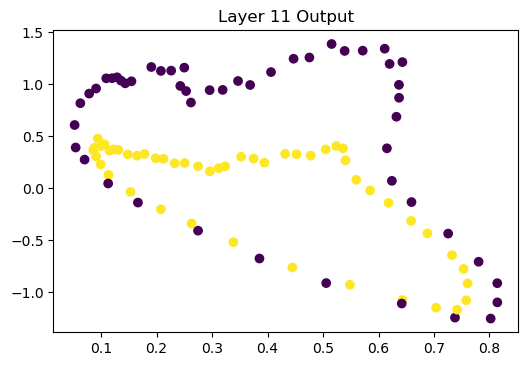

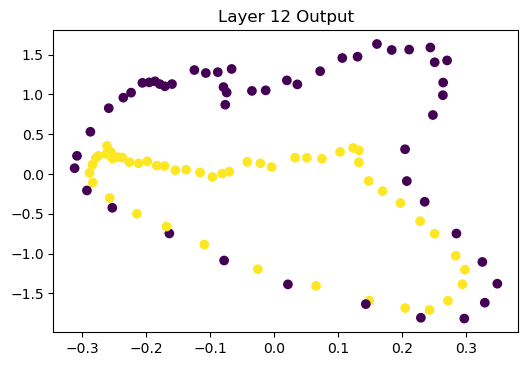

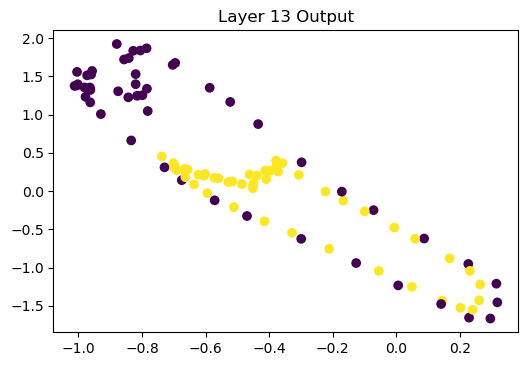

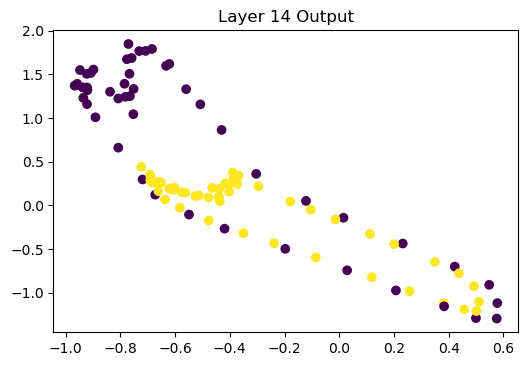

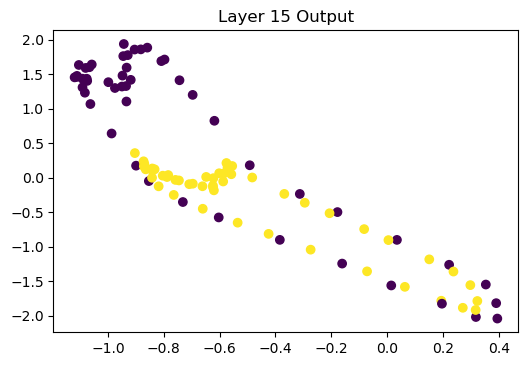

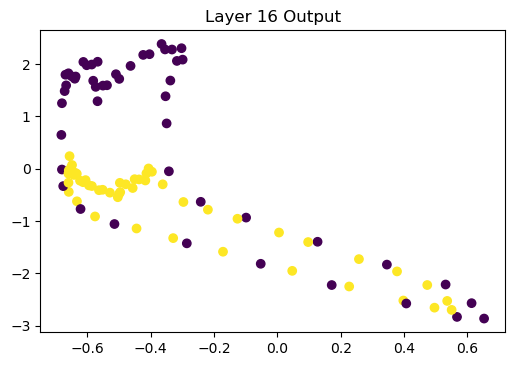

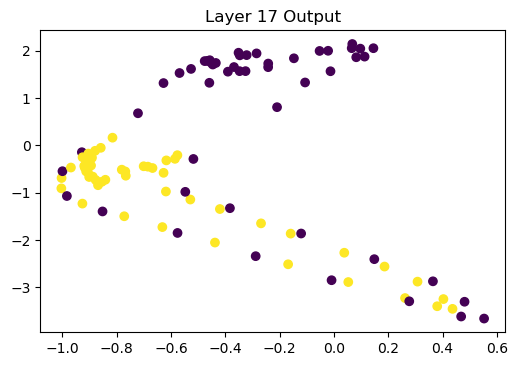

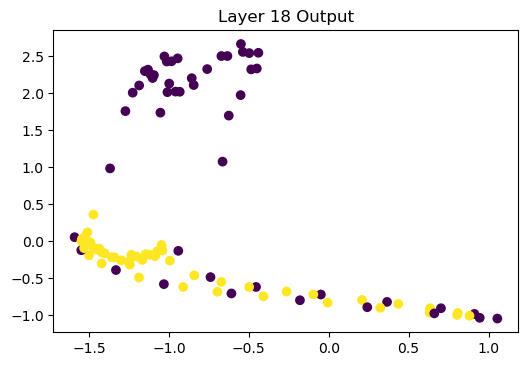

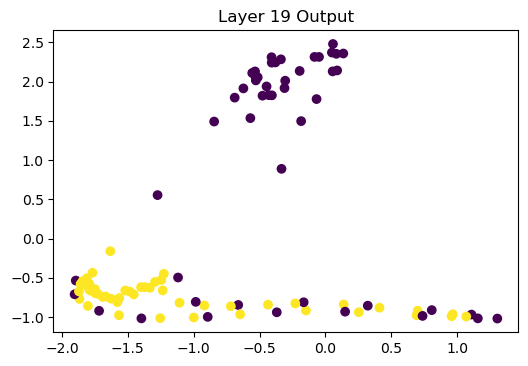

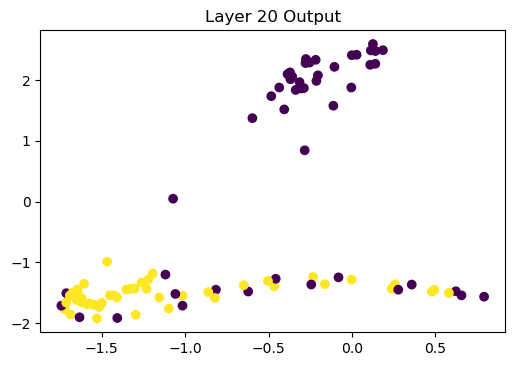

In [ ]:
with torch.no_grad():
    _, trajectories = model(X)
    plot_trajectories(trajectories,y)